In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
import datetime



#file names

calender_file_name = 'calendar.csv'
listings_file_name = 'listings.csv'
review_file_name = 'reviews.csv'

reviews = pd.read_csv(review_file_name)
listings = pd.read_csv(listings_file_name)
calendar = pd.read_csv(calender_file_name)

# Exploratory Data Analysis

In the below section, I will be probing the dataset to select the questions I will be considering
I will look through each table and see what kind of information I can gather



In [2]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [3]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [60]:
print('First Date is {}\nLast date is {}.'.format(calendar['date'].min(),calendar['date'].max()))
calendar.head(20)

First Date is 2016-09-06
Last date is 2017-09-05.


,listing_id,date,available,price,day_of_week,mm_dd
0,12147973,2017-09-05,0,NaN,Tuesday,09-05
1,12147973,2017-09-04,0,NaN,Monday,09-04
2,12147973,2017-09-03,0,NaN,Sunday,09-03
3,12147973,2017-09-02,0,NaN,Saturday,09-02
4,12147973,2017-09-01,0,NaN,Friday,09-01
5,12147973,2017-08-31,0,NaN,Thursday,08-31
6,12147973,2017-08-30,0,NaN,Wednesday,08-30
7,12147973,2017-08-29,0,NaN,Tuesday,08-29
8,12147973,2017-08-28,0,NaN,Monday,08-28
9,12147973,2017-08-27,0,NaN,Sunday,08-27


Calendar seems to show the listing name, availability, and the price for each day

In [5]:
calendar['listing_id'].value_counts().keys()

Int64Index([12898806, 14710769,  7018497,  3946215,   951473,  5718921,
             3278624, 13624476,  9626428, 12175961,
            ...
              973695,  6181230, 10434883,  5026613, 14340601, 13951039,
            13512551,  5270703,   901914,  3250739],
           dtype='int64', length=3585)

We have around 3600 listings in both Calendar and listings

In [6]:
reviews.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [7]:
reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


Listings has a large number of columns. Let's see if the ID here matches the calendar listing_id

In [8]:
#seeing how many listings are in each table

calendar_ids = sorted(calendar['listing_id'].value_counts().keys().tolist())
review_ids = sorted(reviews['listing_id'].value_counts().keys().tolist())
listing_ids = sorted(listings['id'].value_counts().keys().tolist())

In [9]:
print(len(calendar_ids))
print(len(review_ids))
print(len(listing_ids))

3585
2829
3585


# Calendar & Listing have the same number of listings. While around 20% are lacking reviews 
We might be able to leverage the number of reviews a unit has (or lack thereof) to understand occupancy

In [10]:
#checking out comment formatting
reviews['comments'][0]

"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)"

In [11]:
#looking at the different cancellation policies
listings['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [12]:
listings['city'].value_counts()[:10]


Boston              3381
Roxbury Crossing      24
Somerville            19
Brookline             18
Jamaica Plain         18
Cambridge             16
Brighton              15
Dorchester            15
Charlestown           15
Allston               12
Name: city, dtype: int64

# Initial Questions 
#### 1) relationship between number/length of reviews and occupancy ( % of listed dates available )
#### 2) % of vacancies by time of year (Best time to list)
#### 3) Price vs Rating
#### 4) Relationship between availability and price of rental
#### 5) Main factors influencing occupancy rate


# Feature Creation

#1) number of reviews
#2) Average number of words per comment
#3) Repeat visits - gathered from number of repeated reviews
#4) Description length in words
#5) Cancellation policy
#6) Superhost status
#7) Numerically quantify if a listing is instant_bookable
#8) setting up day of week for numerical analysis

In [13]:
#functions


class area_study(object):
    '''class to manipulate listing data and output plots relating price reviews
    takes in a list for each type of housing in each neighborhood 
    Takes in a type of home (e.g full apartment) and a neighborhood (e.g Cambridge)
    Outputs a price vs availability for that combo (e.g full apartment in Cambridge)'''
    
    def __init__(self, area_type,listings,quantiles = [.25,.5,.75,.95],ax=None):
        self.area = area_type[0]
        self.type = area_type[1]
        self.quantiles = quantiles
        
        if ax == None:
            fig, ax = plt.subplots(1)
            self.ax = ax
        else:
            self.ax = ax

        self.category_names = ['Lowest','Middle','High','Ultra-high','Top-Tier']
        
    def get_data(self):
        self.df = listings[(listings['neighbourhood']==self.area) & (listings['room_type'] == self.type)]

    def get_price_ranges(self):
        self.df['average_price'].dropna(how = any, axis = 0,inplace = True)
        prices = self.df['average_price']
        self.quantile_values = [np.quantile(prices,i) for i in self.quantiles]
        #print(self.quantiles)
        #print(self.quantile_values)
    def price_category_mapping(self,entry,quantiles):
        reversed_quantiles = quantiles[::-1]
        for index, quantile in enumerate(reversed_quantiles):
            if entry > quantile:
                return index
                
    def prepare_price_categories(self):
        self.df['price_category'] = pd.Series(np.zeros(self.df.shape[0])).astype(int)
        self.df.loc[:,'price_category'] = self.df['average_price'].apply(lambda price: self.price_category_mapping(price,self.quantile_values))
        #print(self.df['price_category'].value_counts().keys())
        #print(self.df)
    def plot_category_vs_ratings(self):
        colors = ['y','c','g','b','r','m']
        price_categories = list(self.df['price_category'].value_counts().keys())
        cat_dict = {self.category_names[index]:str(price_categories[index]) for index in range(len(price_categories))}
        #print(cat_dict)
        #print(price_categories)
        self.ax.set_title('{} - {}'.format(self.type,self.area))
        self.df.plot.scatter(x = 'average_price',y = 'review_scores_rating', c = 'price_category',cmap = 'tab10_r',ax=self.ax,legend = False)#,ax = ax)
        self.ax.set_ylim([40,100])
        handles, labels = self.ax.get_legend_handles_labels()


def calculate_repeat_visits(listing_id,reviews_df = reviews, listing_id_column_in_reviews_df = 'listing_id'):
    ''' Calculate the number of repeat visits for each listing
    For 'listing_id' == 1178162, should return 1'''
    
    return reviews_df[reviews_df[listing_id_column_in_reviews_df] == listing_id]['reviewer_id'].count() - reviews_df[reviews_df[listing_id_column_in_reviews_df] == listing_id]['reviewer_id'].nunique()

def get_pct_available_from_calendar_for_an_id( _id,calendar = calendar):
    '''Get the % of listed dates from (calendar) for listing with id (_id)'''
    return 100*calendar[calendar['listing_id']==_id]['available'].mean()

def get_listing_average_price(listing_id,table):
    '''Get the average price from (table) for listing with id (listing_id)'''
    return table[table['listing_id'] == listing_id]['price'].mean()

def category_mapping(entry,quantiles,categories=None):
    '''aims to binarize continous variables based on different quantiles
    Provides category (larger number means larger quantile) if no categories are provided'''
    #sort in reverse
    quantiles = sorted(quantiles)
    reversed_quantiles = quantiles[::-1]
    
    if categories == None: 
        for index, quantile in enumerate(reversed_quantiles):
            #go thru the reverse sorted list (largest to smallest).
            #Once your entry is larger than the category cutoff:
            if entry > quantile:
                #if no category, return category number
                return int(len(quantiles) - index)
    else:
        reverse_categories = categories[::-1]


        for index, quantile in enumerate(reversed_quantiles):
            #go thru the reverse sorted list (largest to smallest).
            #Once your entry is larger than the category cutoff:
            if entry > quantile:
                #provide a category name
                return reverse_categories[index]

def dummy_column_creator(df,column_name,dummyna=True,drop_first = True,remove_column =False):
    #create dummies for column_name and merge with df
    #option to remove original column
    #option to create dummy column for nans and option to drop original column
    temp = pd.get_dummies(df[column_name],drop_first = drop_first,dummy_na=dummyna,prefix=column_name)
    if remove_column == True:
        return pd.concat([temp,df.loc[:,df.columns!=column_name]])
    else:
        return pd.concat([temp,df])



Need to reformat price into integer value

In [14]:
#remove dollar signs, commas, decimal points, and transform into integer
listings.loc[:,'price'] = listings['price'].apply(lambda x: x.replace('$',''))
listings.loc[:,'price'] = listings['price'].apply(lambda x: x.replace(',',''))
listings.loc[:,'price'] = listings['price'].apply(lambda x: int(x.split('.')[0]))

In [15]:
# Creating the features
#1) number of reviews
#create df holding number of reviews, and merge it with the listing
review_count = reviews.groupby('listing_id')['comments'].count()


#2) Average number of words per comment
reviews['word_count'] = reviews['comments'].apply(lambda x: len(x.split(' ')) if type(x) == str else 0)
#review_word_count = reviews.groupby('listing_id')['word_count'].average()

#3) Repeat visits - gathered from number of repeated reviews


listings['number of repeat visits'] = listings['id'].apply(lambda x: calculate_repeat_visits(x))

#4) Description length in words

listings['Description_length'] = listings['description'].apply(lambda x: len(x.split(' ')) if type(x) == str else 0)

#5) Cancellation policy

cancellation_policy = pd.get_dummies(listings['cancellation_policy'],prefix = 'cancellation_policy',drop_first = False)
listings = pd.concat([listings.loc[:,listings.columns != 'cancellation_policy'],cancellation_policy],axis = 1)

#6) Superhost status

listings.loc[:,'host_is_superhost'] = listings['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

#7) Numerically quantify if a listing is instant_bookable
listings['instant_bookable'].replace('f',0,inplace=True)
listings['instant_bookable'].replace('t',1,inplace=True)

#8) setting up day of week for numerical analysis
weekday_dict = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
calendar['day_of_week'] = calendar['date'].apply(lambda x: weekday_dict[datetime.date(year = int(x.split('-')[0]), month = int(x.split('-')[1]), day = int(x.split('-')[2])).isoweekday()])



# Questions to look at 
#### 1) biggest factors that influence how often a listing is available
#### 2) Best time of year to list
#### 3) Best days of week to list
#### 4) Relationship between availability and price of rental

In [16]:
#### 1) relationship between number/length of reviews and % of listed dates available
#to gather this info, we need the % of dates available.
calendar.loc[:,'available'] = calendar['available'].apply(lambda x: 1 if x == 't' else 0)

listings['% available'] = listings['id'].apply(lambda x: get_pct_available_from_calendar_for_an_id( _id = x, calendar = calendar))

listings['% occupied'] = listings['% available'].apply(lambda x: 100 - x)

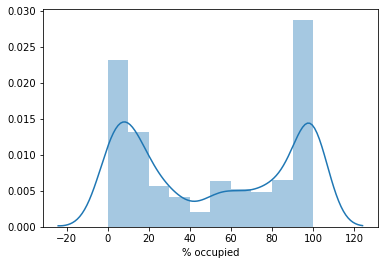

In [17]:
sns.distplot(listings['% occupied'])

In [18]:
#get all columns with numerical values
numerical_listings = listings.loc[:,listings.dtypes != object]
#drop any column that is all NAs
numerical_listings.dropna(axis = 1, how = 'all',inplace = True)

<ipython-input-18-7c97e9b3d296>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_listings.dropna(axis = 1, how = 'all',inplace = True)


In [19]:
numerical_listings.columns
columns_to_investigate = [ 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'number of repeat visits', 'Description_length',
       'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict',
        'cancellation_policy_super_strict_30','host_is_superhost', '% occupied']

# What are the biggest factors that influence how often a listing is available?

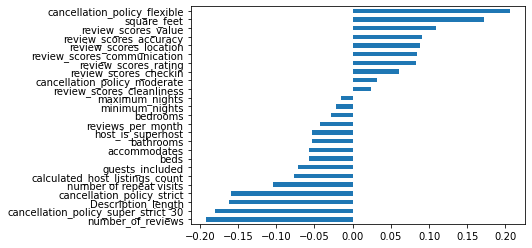

In [20]:

numerical_listings[columns_to_investigate].corr()['% occupied'].drop('% occupied').sort_values().plot(kind = 'barh')

This graph tells us that the number of reviews, having a strict cancellation policy, and a long description for your listing, are the off-putting to rentals! Leading to a higher rate of vacancy for a listing.
On the other hand, a flexible booking policy, a higher square foot-age (duh!) and a high review score for accuracy, seem to have the most positive effect on getting people to rent your property/

Features that didn't swing heavily either way were 
 1) Minimum nights
 2) Maximum nights
 3) Number of bedrooms
 4) Number of bathrooms.

# Question 2!
# What is the Best time to list?
By looking at the listing date, and the % of rentals that were vacant, in combination with the number of listed rentals, we can get a good idea of when there's a surge in rental activity in Boston!


In [21]:
calendar.head(10)

,listing_id,date,available,price,day_of_week
0,12147973,2017-09-05,0,NaN,Tuesday
1,12147973,2017-09-04,0,NaN,Monday
2,12147973,2017-09-03,0,NaN,Sunday
3,12147973,2017-09-02,0,NaN,Saturday
4,12147973,2017-09-01,0,NaN,Friday
5,12147973,2017-08-31,0,NaN,Thursday
6,12147973,2017-08-30,0,NaN,Wednesday
7,12147973,2017-08-29,0,NaN,Tuesday
8,12147973,2017-08-28,0,NaN,Monday
9,12147973,2017-08-27,0,NaN,Sunday


In [22]:
print('Start date of dataset is {}\n End date of dataset is {}'.format(calendar.date.min(),calendar.date.max()))

Start date of dataset is 2016-09-06
 End date of dataset is 2017-09-05


In [23]:
calendar['mm_dd'] = calendar['date'].apply(lambda x: str(x.split('-')[1])+'-' +str(x.split('-')[2]))

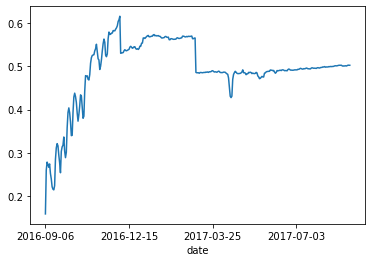

In [24]:
fig, ax = plt.subplots(1)
ax.locator_params(axis='x', nbins=6)
calendar.groupby(by = 'date')['available'].mean().plot(ax = ax)


# It seems like the winter isn't a great time to be leasing!
But the winter in Boston is so cold! Anyone could've told you that.
Let's look at the relationship between The rental prices and the calendar year

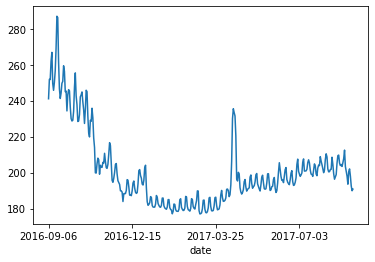

In [25]:
vacant = calendar[calendar['available']== 1].copy()
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: x.replace('$',''))
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: x.replace(',',''))
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: int(x.split('.')[0]))



fig, ax = plt.subplots(1)
ax.locator_params(axis='x', nbins=6)
vacant.groupby(by = 'date')['price'].mean().plot(ax = ax)



In [26]:
vacant[vacant['available']== 1]['price'].max()

7163

It looks like there's one particular weekend where the availability drops, and the price skyrockets!
Let's see what weekend that is

In [27]:
availability_in_spike_range = calendar[(calendar['date']>'2017-03-25') & (calendar['date']<'2017-07-03')].groupby(by = 'date')['available'].mean()

Minimum availability is on 2017-04-16, where there was a massive price drop for 3 days


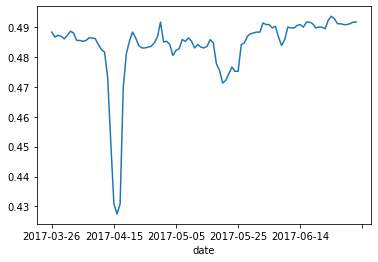

In [28]:
print('Minimum availability is on {}, where there was a massive price drop for 3 days'.format(availability_in_spike_range[availability_in_spike_range == availability_in_spike_range.min()].keys()[0]))
availability_in_spike_range.plot()#[availability_in_spike_range == availability_in_spike_range.min()]


# It looks like the day of the Boston Marathon is a great day to have an airbnb in Boston!
Let's see what happens to prices in that time

date
2017-04-15    235.501618
Name: price, dtype: float64

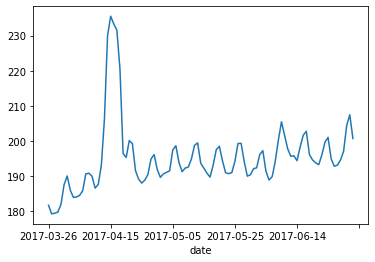

In [29]:
price_in_spike_range = vacant[(vacant['date']>'2017-03-25') & (vacant['date']<'2017-07-03')].groupby(by = 'date')['price'].mean()



price_in_spike_range.plot()
price_in_spike_range[price_in_spike_range == price_in_spike_range.max()]



## Large events seem to boost prices and reduce availability. What about days of week?
Are weekends more likely to net you a higher price?

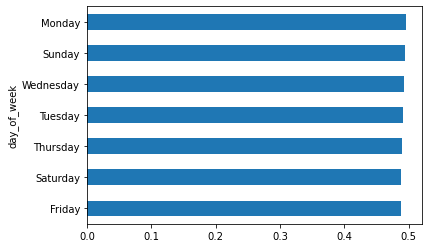

In [30]:
calendar.groupby('day_of_week')['available'].mean().sort_values().plot(kind = 'barh')

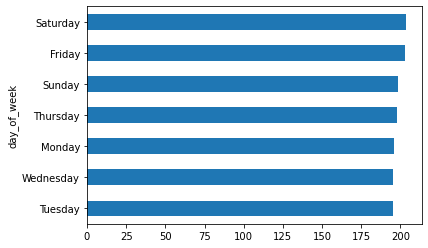

In [31]:
vacant.groupby('day_of_week')['price'].mean().sort_values().plot(kind = 'barh')

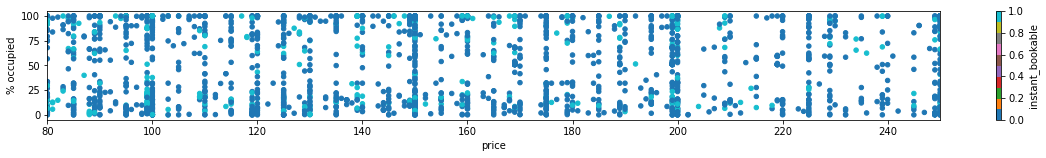

In [32]:
listings_2 = listings.copy()
#clearing cases where price is NA
listings_2['price'].dropna(inplace = True)
_, ax = plt.subplots(figsize = (20,2))
listings_2.plot(x='price',y='% occupied',c='instant_bookable',cmap = 'tab10',kind = 'scatter',xlim = [80,250],ax = ax)

# Question 3:
What is the relationship between Price & Rating?



In [33]:
listings['average_price'] = listings['id'].apply(lambda x: get_listing_average_price(x,vacant))

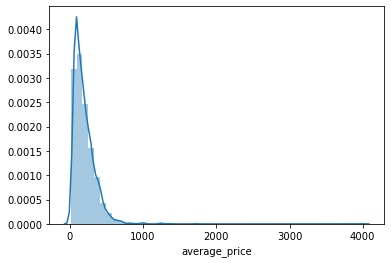

In [34]:
#this is the distribution of prices
sns.distplot(listings['average_price'])

# Let's take a look at the overall trend

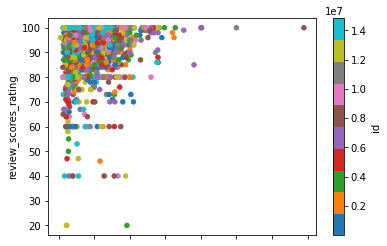

In [35]:
listings.plot(kind = 'scatter',x = 'average_price',y = 'review_scores_rating',c = 'id',cmap = 'tab10' )

From this rough overview, we can see that while the vast majority of cheaper listings are high in satisfaction, the overall quality does increase when entering the top 1% of listings

In [36]:
# to keep certain factors constant, let's look at the largest category of listings
print(list(listings.columns))
listings.groupby(by = ['room_type','neighbourhood'])['id'].count().sort_values(ascending = False)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

room_type        neighbourhood    
Entire home/apt  Back Bay             251
                 South End            231
Private room     Allston-Brighton     209
Entire home/apt  Fenway/Kenmore       187
Private room     Jamaica Plain        167
                                     ... 
Shared room      Mattapan               1
                 Hyde Park              1
                 Downtown Crossing      1
Entire home/apt  Mattapan               1
Shared room      West End               1
Name: id, Length: 76, dtype: int64

In [37]:
listings_to_study = listings.groupby(by = ['room_type','neighbourhood'])['id'].count().sort_values(ascending = False).reset_index()[:10]

/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)
<ipython-input-13-24886fb5c954>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['price_category'] = pd.Series(np.zeros(self.df.shape[0])).astype(int)
/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

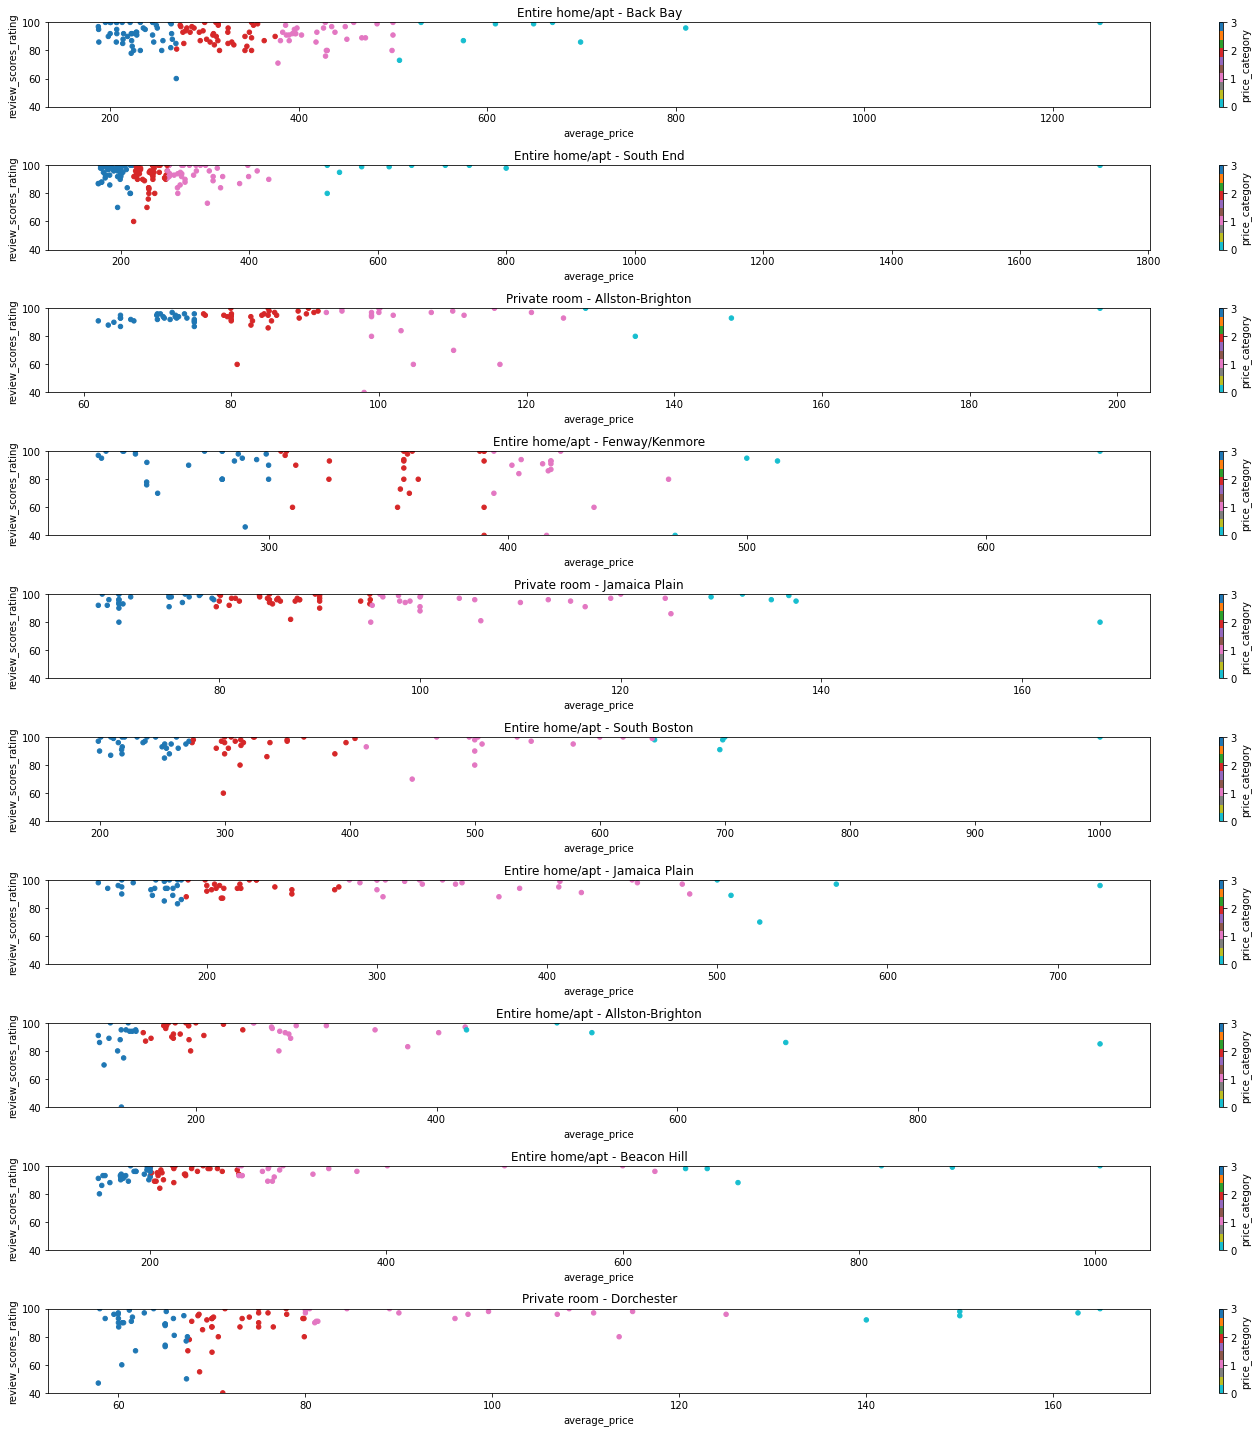

In [38]:
fig, ax = plt.subplots(10,figsize = (20,20),tight_layout = True)
#fig.subplots_adjust()
for index, row in enumerate(listings_to_study.iterrows()):

    area_to_study = row[1]['neighbourhood']
    room_type = row[1]['room_type']
    study = area_study([area_to_study,room_type],listings,ax = ax[index])
    study.get_data()
    study.get_price_ranges()
    study.prepare_price_categories()
    study.plot_category_vs_ratings()


# Most reviews seem to be positive, and while there are a few cases where you get what you pay for, the graphs don't represent the facts of the matter, let's look at the numerical breakdown here
We'll be seperating the prices into quartiles, and looking at the average review for each.

In [39]:
quantiles = [.25,.5,.75,.95]
print(quantiles)
            
temp_listings = listings[~listings['average_price'].isna()]
quantiles = [.25,.5,.75,.95]
prices = temp_listings['average_price'].values
quantile_values = [np.quantile(prices,i) for i in quantiles]
quantile_values.insert(0,0)
categories = ['Lowest Price','Budget','Average','Expensive','Most expensive']


temp_listings.loc[:,'price_category'] = temp_listings['average_price'].apply(lambda price: category_mapping(price,quantile_values,categories = categories))





[0.25, 0.5, 0.75, 0.95]


/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [40]:
listing_price_rating_breakdown = temp_listings.groupby(['neighbourhood','room_type','price_category'])['review_scores_rating'].mean().reset_index()

In [41]:
temp_listings['price_category'].value_counts()

Lowest Price      735
Budget            731
Average           713
Expensive         581
Most expensive    146
Name: price_category, dtype: int64

In [42]:
temp_listings.groupby('price_category')['review_scores_rating'].mean()

price_category
Average           92.905565
Budget            91.752459
Expensive         91.813084
Lowest Price      90.949675
Most expensive    93.209524
Name: review_scores_rating, dtype: float64

# As we'd expect, the Lowest Priced listings had the lowest reviews, and the highest priced units had the best reviews.

Maybe we're missing some info.
Let's break it down by neighborhood and room type.

In [43]:
for neighbourhood_ in list(listing_price_rating_breakdown['neighbourhood'].value_counts().keys()):
    print(listing_price_rating_breakdown[listing_price_rating_breakdown['neighbourhood']==neighbourhood_].sort_values(by= 'review_scores_rating').dropna(),'\n\n')

       neighbourhood        room_type  price_category  review_scores_rating
1   Allston-Brighton  Entire home/apt          Budget             88.966667
6   Allston-Brighton     Private room          Budget             90.034483
4   Allston-Brighton  Entire home/apt  Most expensive             91.000000
3   Allston-Brighton  Entire home/apt    Lowest Price             91.500000
7   Allston-Brighton     Private room    Lowest Price             91.853659
2   Allston-Brighton  Entire home/apt       Expensive             92.250000
0   Allston-Brighton  Entire home/apt         Average             95.043478
11  Allston-Brighton      Shared room    Lowest Price             95.666667
5   Allston-Brighton     Private room         Average            100.000000
10  Allston-Brighton      Shared room          Budget            100.000000 


    neighbourhood        room_type  price_category  review_scores_rating
164     South End  Entire home/apt    Lowest Price             88.000000
169     South E

86  Financial District  Entire home/apt  Most expensive                  96.5 


        neighbourhood        room_type price_category  review_scores_rating
88  Government Center  Entire home/apt        Average                  92.0
89  Government Center  Entire home/apt      Expensive                  92.0 


    neighbourhood     room_type price_category  review_scores_rating
45  Chestnut Hill  Private room   Lowest Price                  90.0 


Empty DataFrame
Columns: [neighbourhood, room_type, price_category, review_scores_rating]
Index: [] 




# The highest priced listings tended to not be the worst, but taking into account the neighborhood and room type, the price doesnt seem to scale directly with the average review score. Maybe there's a case of adjusted expectations?

# With ~74% of listings getting a score of above 90%, we realize that there is a skew when it comes to reviews. We will break down the review scores into categories, and see whether the price correlates with the reviews


In [44]:
temp_listings.groupby('price_category')['review_scores_rating'].mean().reset_index()

,price_category,review_scores_rating
0,Average,92.905565
1,Budget,91.752459
2,Expensive,91.813084
3,Lowest Price,90.949675
4,Most expensive,93.209524


In [45]:
boxes = [np.quantile(listings['review_scores_rating'].dropna(),i) for i in [.26,.35,.46,.56,.66,.76,.86]]
temp_listings['review_scores_rating_category'] = listings['review_scores_rating'].apply(lambda entry: category_mapping(entry,boxes))

<ipython-input-45-b319efdfbe5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_listings['review_scores_rating_category'] = listings['review_scores_rating'].apply(lambda entry: category_mapping(entry,boxes))


In [46]:
print(boxes)
temp_listings['review_scores_rating_category'].value_counts()

[90.0, 91.0, 93.0, 95.0, 97.0, 99.0, 100.0]


6.0    450
4.0    336
2.0    284
3.0    255
5.0    197
1.0     87
Name: review_scores_rating_category, dtype: int64

In [47]:
listings.loc[:,'price_category'] = listings['average_price'].apply(lambda price: category_mapping(price,quantile_values))
#listings = dummy_column_creator(listings,'review_scores_rating_category')
listings = dummy_column_creator(listings,'price_category',drop_first = False)
listings = dummy_column_creator(listings,'room_type',drop_first = False)
listings = dummy_column_creator(listings,'neighbourhood',drop_first = False)




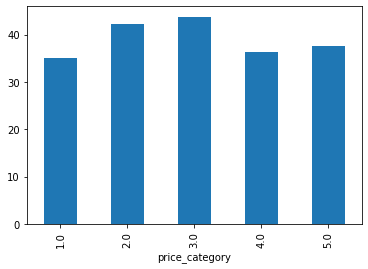

In [48]:
listings.groupby('price_category')['% occupied'].mean().plot(kind = 'bar')

In [49]:
price_category_bookable = listings.groupby(['price_category','instant_bookable'])['% occupied'].mean().reset_index()

[0.25, 0.5, 0.75, 0.95]
[0, 90.0, 160.0, 264.71766381766383, 447.8862951807229]


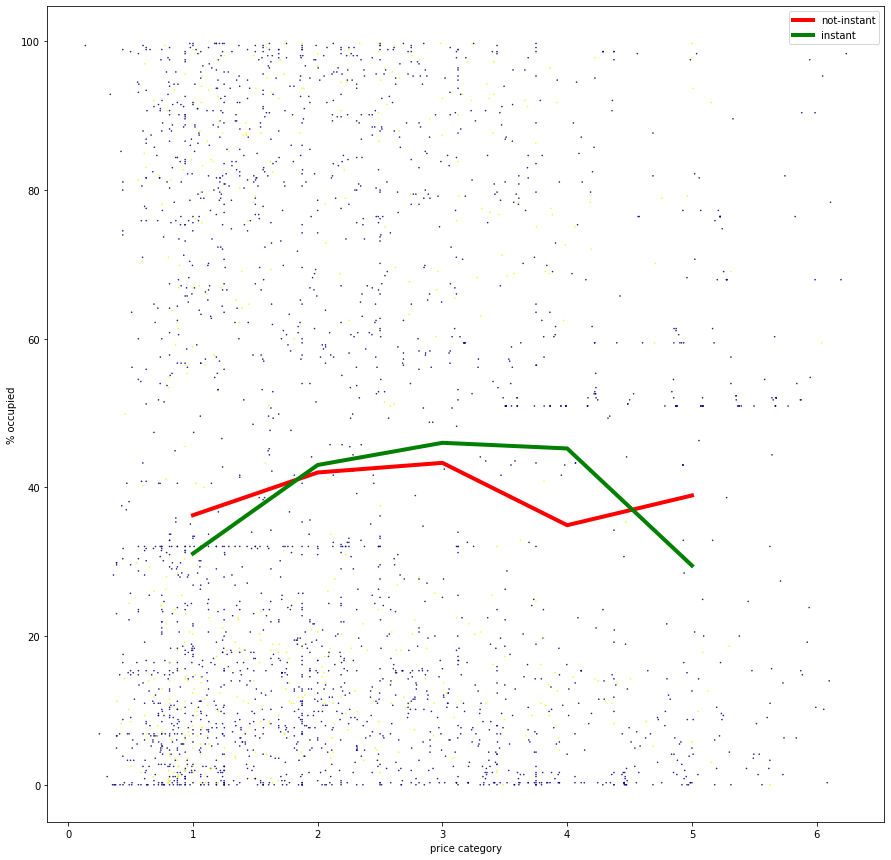

In [50]:
fig, ax = plt.subplots(1,figsize = (15,15))
print(quantiles)
print(quantile_values)
ax.plot(price_category_bookable[price_category_bookable['instant_bookable']==0]['price_category'],price_category_bookable[price_category_bookable['instant_bookable']==0]['% occupied'],c = 'r',label = 'not-instant',linewidth = 4)#,s='10')
ax.plot(price_category_bookable[price_category_bookable['instant_bookable']==1]['price_category'],price_category_bookable[price_category_bookable['instant_bookable']==1]['% occupied'],c = 'g',label = 'instant',linewidth = 4)
ax.scatter(listings[listings['average_price']<500]['average_price']/80,listings[listings['average_price']<500]['% occupied'],c = listings[listings['average_price']<500]['instant_bookable'],cmap='plasma',s=0.3)
ax.set_xlabel('price category')
ax.set_ylabel('% occupied')
ax.legend()

In [51]:
listings['neighbourhood'].replace(np.nan,0,inplace = True)
neighbourhoods = listings['neighbourhood'].dropna().value_counts().keys().tolist()

listings['neighborhood_number'] = listings['neighbourhood'].apply(lambda x: neighbourhoods.index(x))


numerical_listings = listings.loc[:,listings.dtypes != object]
#drop any column that is all NAs
numerical_listings.dropna(axis = 1, how = 'all',inplace = True)

<ipython-input-51-d3278f250b98>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_listings.dropna(axis = 1, how = 'all',inplace = True)


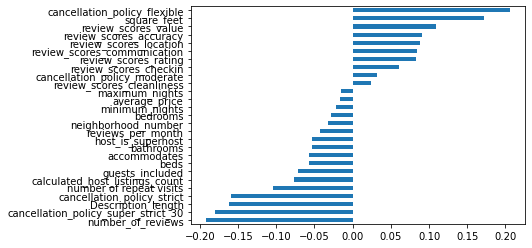

In [52]:
columns_to_investigate = ['neighborhood_number','average_price','accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'number of repeat visits', 'Description_length',
       'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict',
                          'cancellation_policy_super_strict_30','host_is_superhost', '% occupied']
numerical_listings[columns_to_investigate].corr()['% occupied'].drop('% occupied').sort_values().plot(kind = 'barh')

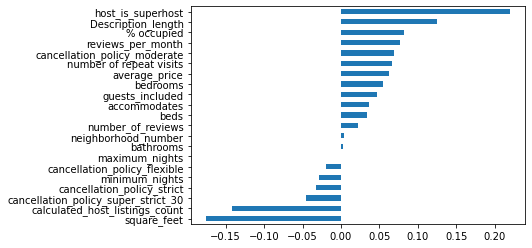

In [53]:
columns_to_investigate = ['neighborhood_number','average_price','accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'calculated_host_listings_count','review_scores_rating',
       'reviews_per_month', 'number of repeat visits', 'Description_length',
       'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30','host_is_superhost', '% occupied']
numerical_listings[columns_to_investigate].corr()['review_scores_rating'].drop('review_scores_rating').sort_values().plot(kind = 'barh')

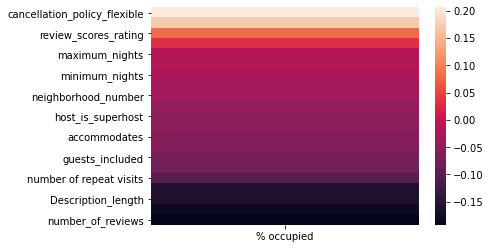

In [54]:
#based on https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
myBasicCorr = numerical_listings[columns_to_investigate].corr()

#mask = np.zeros(myBasicCorr.shape, dtype=bool)
#mask[np.triu_indices(len(mask))] = True
columns_to_investigate = ['neighborhood_number','average_price','accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'calculated_host_listings_count','review_scores_rating',
       'reviews_per_month', 'number of repeat visits', 'Description_length',
       'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict',
                          'cancellation_policy_super_strict_30','host_is_superhost', '% occupied']

sns.heatmap(myBasicCorr[['% occupied']].drop('% occupied',axis = 0).sort_values(by = '% occupied',ascending=False))




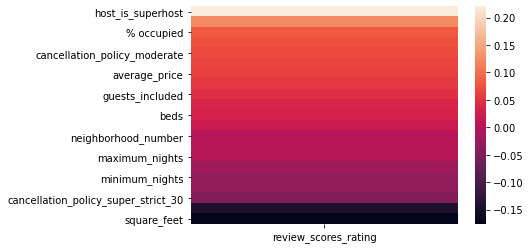

In [55]:
sns.heatmap(myBasicCorr[['review_scores_rating']].drop('review_scores_rating',axis = 0).sort_values(by = 'review_scores_rating',ascending=False))



We can see here there is a strong relationship between # of reviews and # of repeat visits

In [56]:
#neighborhood number is simply a categorical variable, let's take a deeper dive

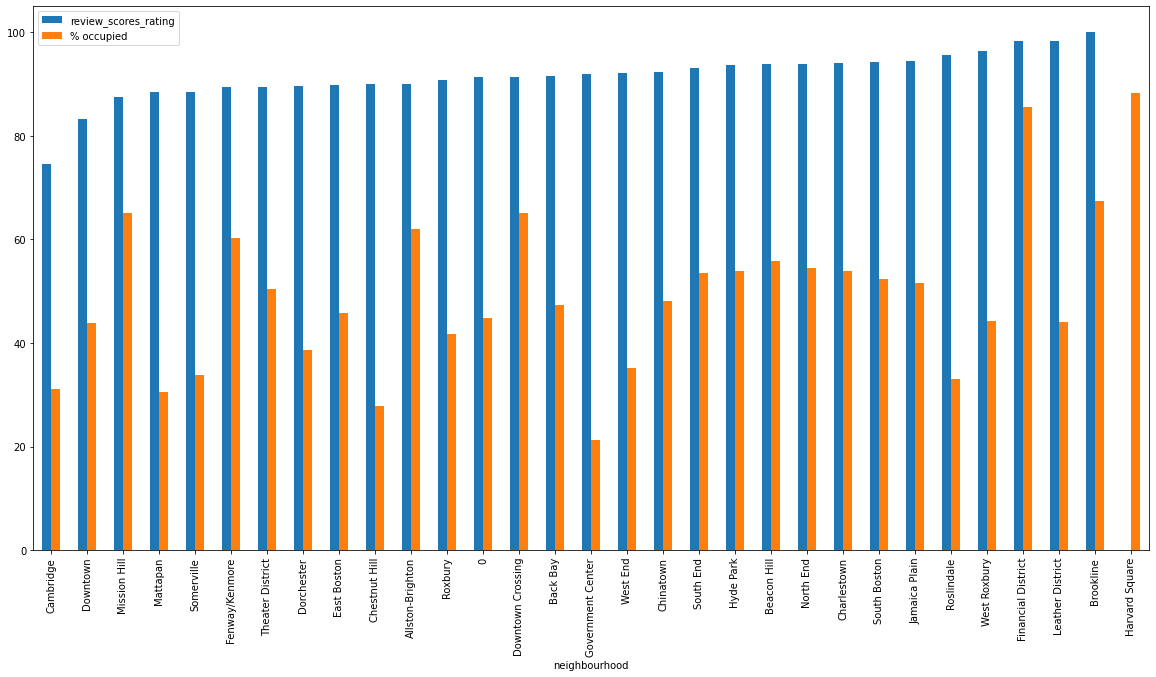

In [57]:
_,ax = plt.subplots(figsize = (20,10))
listings.groupby('neighbourhood')[['review_scores_rating','% occupied']].mean().sort_values(by='review_scores_rating').plot(kind = 'bar',ax=ax)

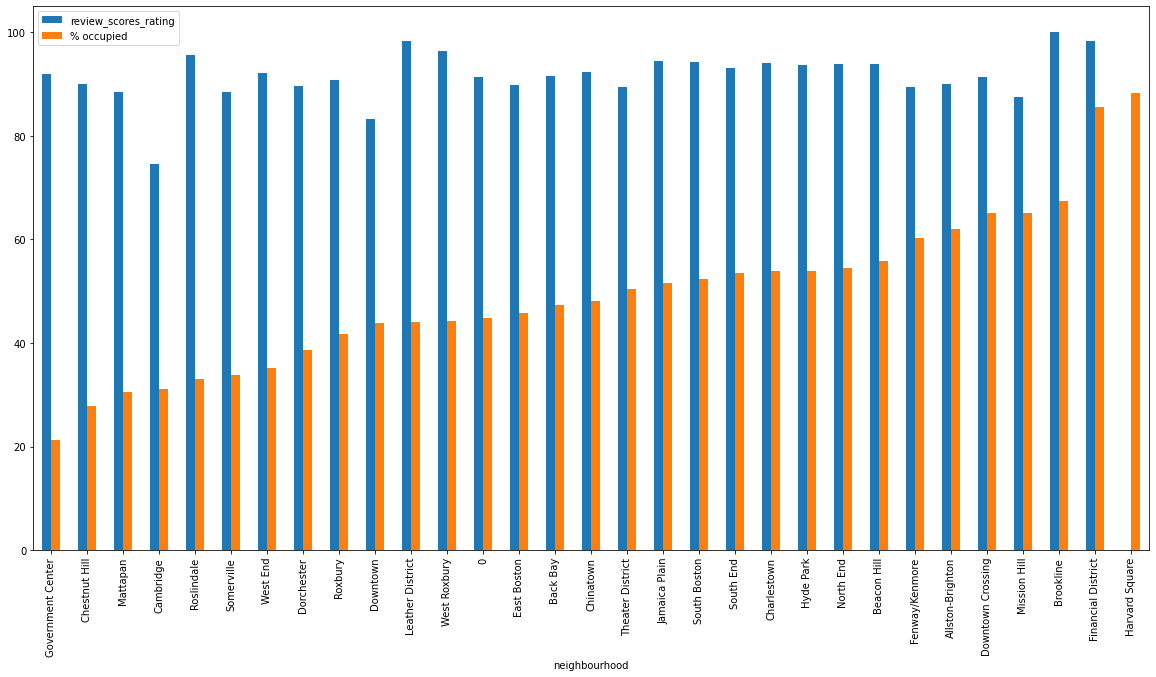

In [58]:
_,ax = plt.subplots(figsize = (20,10))
listings.groupby('neighbourhood')[['review_scores_rating','% occupied']].mean().sort_values(by='% occupied').plot(kind = 'bar',ax=ax)